In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

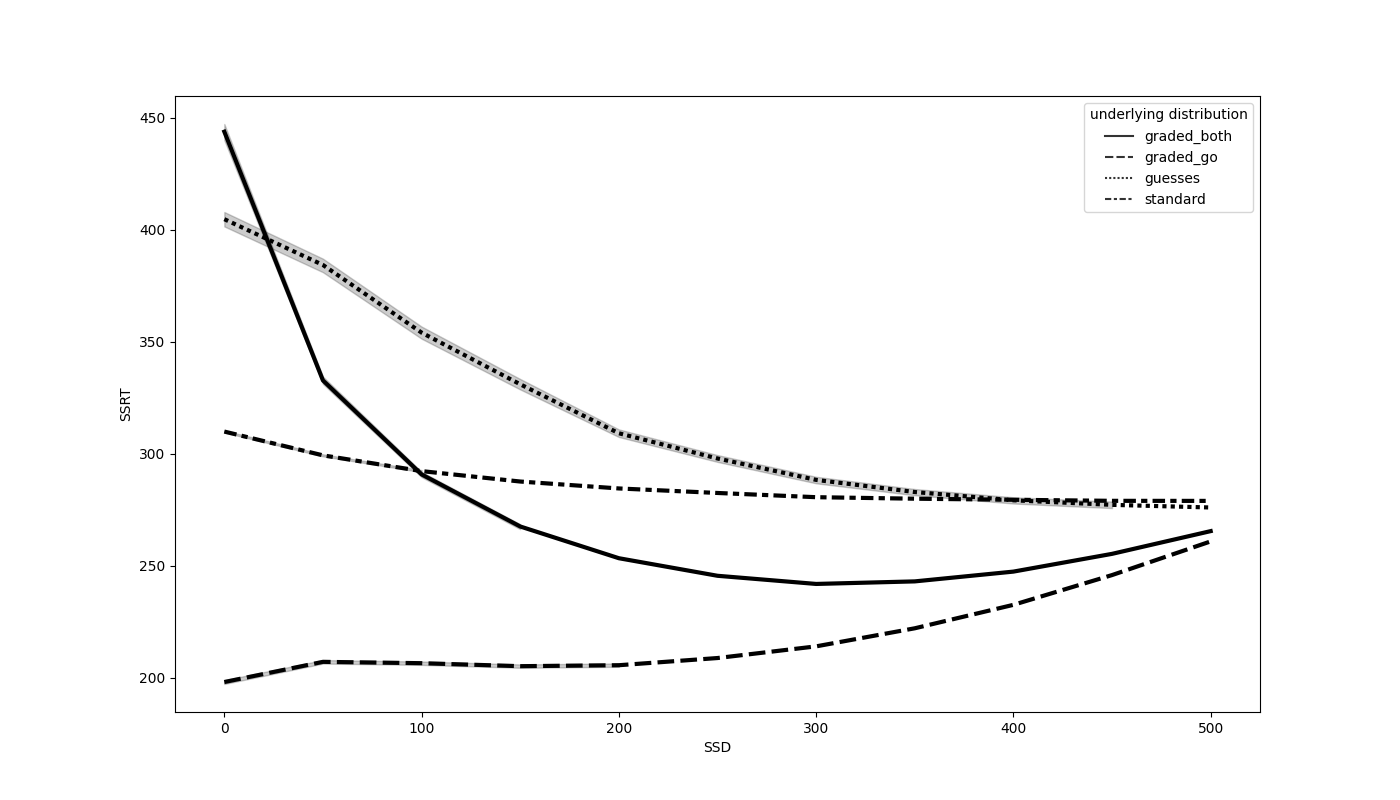

In [2]:
Image('figures/SSRT_by_SSD.png')

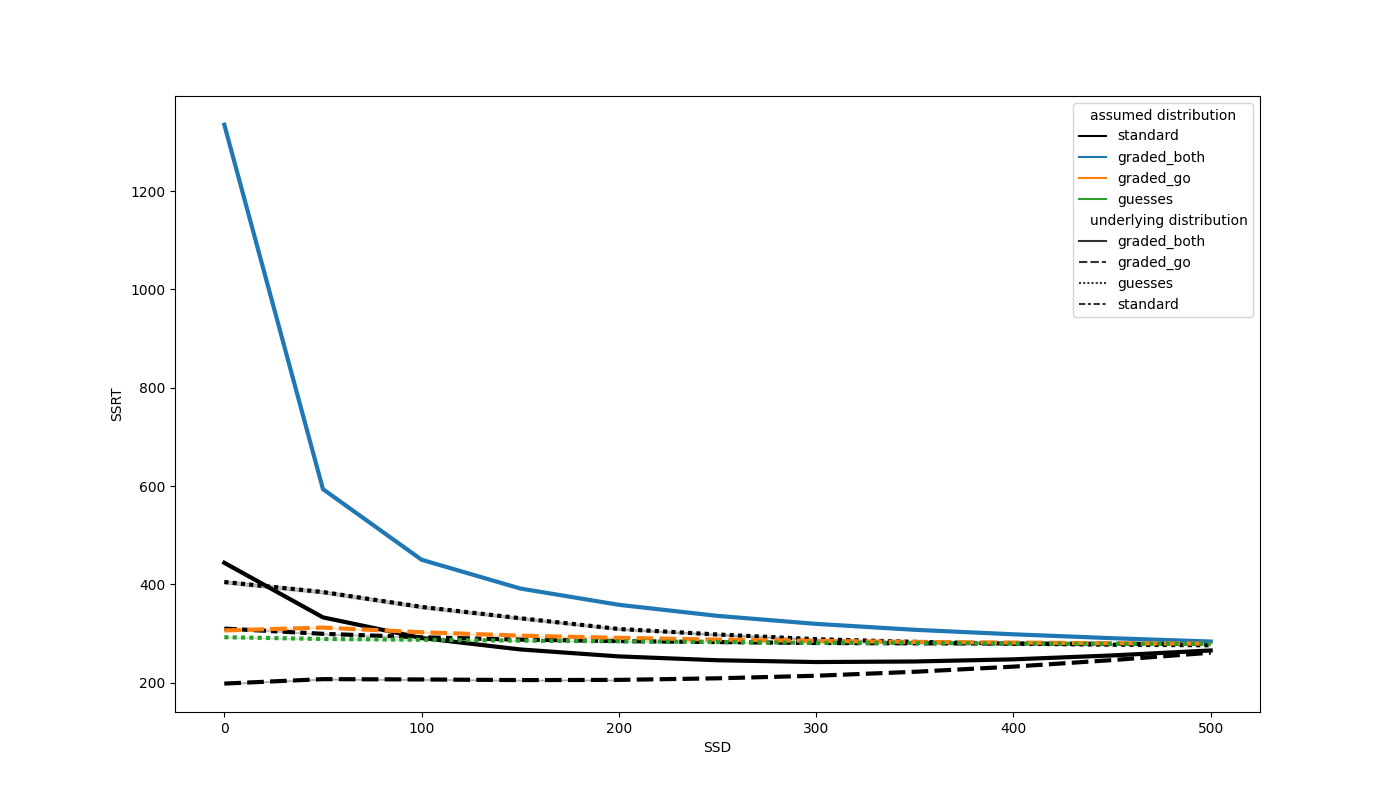

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

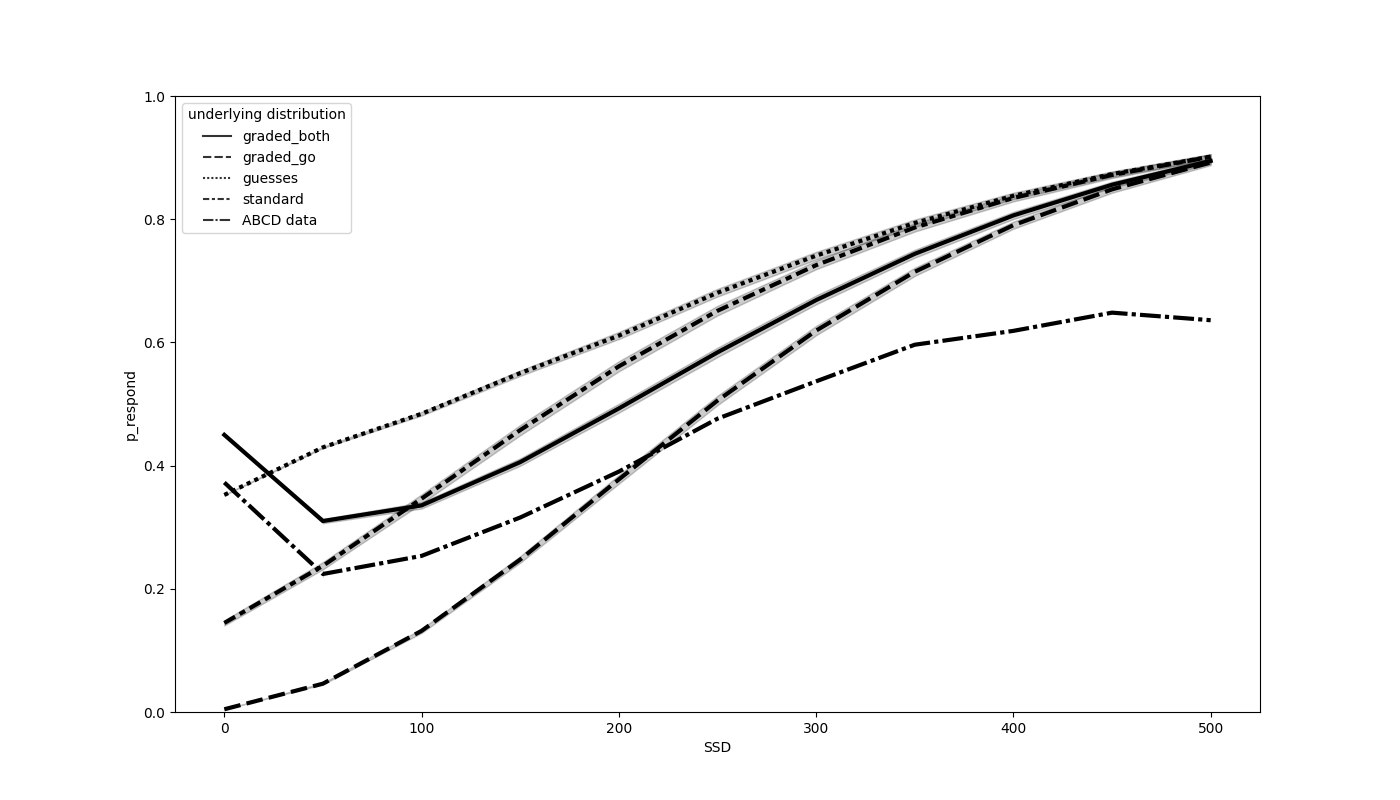

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [6]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [7]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [8]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [9]:
mus_df.head()

,goRT,go,SSRT,stop
003RTV85,561.562403,0.195480,301.339962,0.397867
007W6H7B,512.717273,0.216115,301.339962,0.397867
00CY2MDM,491.778190,0.226358,301.339962,0.397867
00HEV6HB,535.591873,0.205934,301.339962,0.397867
00J52GPG,437.594534,0.258002,301.339962,0.397867


In [10]:
monster_df = pd.concat([mus_df.add_prefix('assigned_'), sim_rt_info, df], 1, sort=True)
monster_df.columns = [col.split('.')[0] for col in monster_df.columns]
monster_df = monster_df.loc[monster_df['gen-standard_SSRT-fixed'].notnull()]

In [11]:
monster_df

,assigned_goRT,assigned_go,assigned_SSRT,assigned_stop,sim_rt_mean,sim_rt_std,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,...,gen-guesses_SSRT-graded_both,gen-standard_SSRT-graded_both,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
00J52GPG,437.594534,0.258002,301.339962,0.397867,537.5210,216.061634,319.716667,186.900000,326.650000,292.566667,...,796.133333,642.700000,251.0,194.0,289.0,270.0,263.236,189.240,303.234,282.930
00LJVZK2,443.776928,0.253951,301.339962,0.397867,512.0010,196.643602,274.566038,202.245283,302.849057,285.056604,...,575.339623,498.264151,254.0,194.0,291.0,275.0,269.000,188.936,311.838,281.494
00R4TXET,561.484011,0.195510,301.339962,0.397867,529.3815,207.965889,264.250000,215.316667,317.133333,286.550000,...,478.400000,412.850000,274.0,217.0,341.0,289.0,261.342,209.468,347.386,284.384
028WCTG6,531.390858,0.207731,301.339962,0.397867,544.3005,218.878764,260.100000,213.800000,315.383333,284.333333,...,462.666667,405.650000,275.0,217.0,326.0,282.0,259.180,205.062,339.484,287.020
029PWCFY,706.055116,0.152426,301.339962,0.397867,516.4205,196.747987,316.333333,226.833333,389.583333,293.933333,...,601.450000,413.416667,301.0,231.0,396.0,297.0,260.088,231.304,361.898,282.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUXHPX3N,491.914102,0.226288,301.339962,0.397867,481.6645,182.295748,249.883333,220.950000,281.000000,287.550000,...,372.266667,366.133333,275.0,209.0,312.0,282.0,265.374,195.240,329.744,279.570
ZWWDT1TG,502.202850,0.221140,301.339962,0.397867,620.1270,271.202340,241.571429,215.821429,288.232143,271.303571,...,380.160714,372.214286,267.0,207.0,315.0,281.0,262.950,200.876,328.704,282.522
ZXF5C635,546.556190,0.201387,301.339962,0.397867,466.2770,167.058153,252.116667,213.383333,303.166667,283.783333,...,406.383333,377.616667,281.0,213.0,342.0,292.0,254.762,211.534,343.154,282.826
ZXPAWB32,488.117554,0.228249,301.339962,0.397867,460.1125,169.012844,259.758621,220.948276,283.810345,279.741379,...,354.172414,342.517241,265.0,202.0,310.0,282.0,264.104,196.832,326.776,280.430


In [12]:
def make_plot_square(ax):
    lowx, highx = ax.get_xlim()
    lowy, highy = ax.get_ylim()
    low = min(lowx, lowy)
    high = max(highx, highy)
    ax.set_xlim((low, high))
    ax.set_ylim((low, high))
    return ax

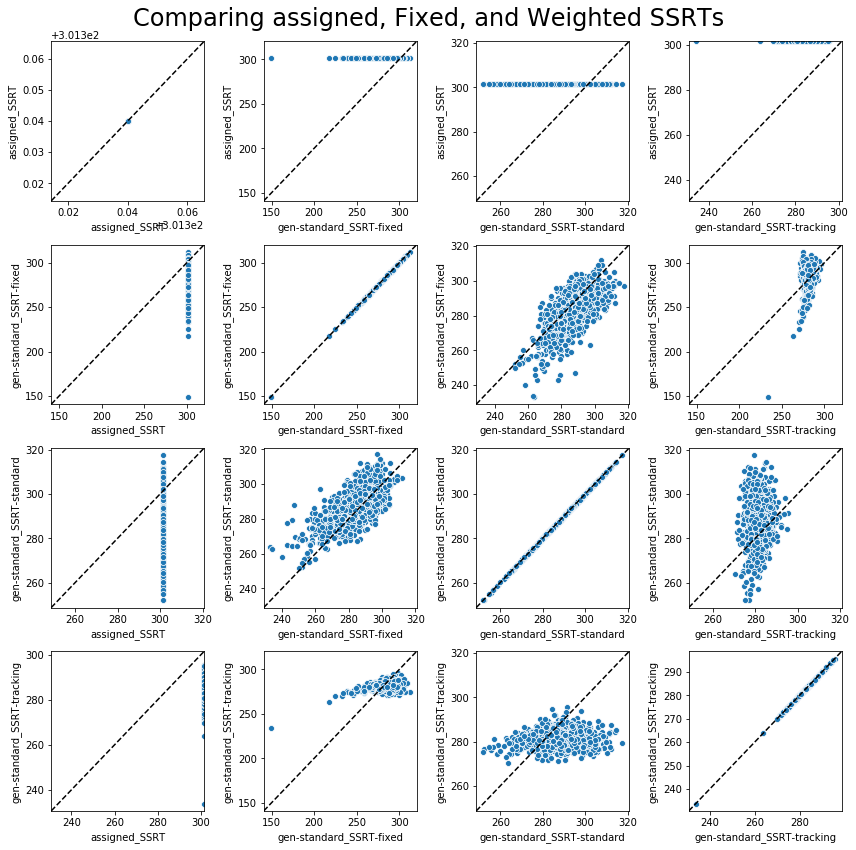

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

columns = ['assigned_SSRT', 'gen-standard_SSRT-fixed', 'gen-standard_SSRT-standard', 'gen-standard_SSRT-tracking']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing assigned, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [14]:
monster_df[columns].corr(method='spearman')

,assigned_SSRT,gen-standard_SSRT-fixed,gen-standard_SSRT-standard,gen-standard_SSRT-tracking
assigned_SSRT,NaN,NaN,NaN,NaN
gen-standard_SSRT-fixed,NaN,1.000000,0.642308,0.172669
gen-standard_SSRT-standard,NaN,0.642308,1.000000,0.127805
gen-standard_SSRT-tracking,NaN,0.172669,0.127805,1.000000


# Comparing Fixed SSRTs

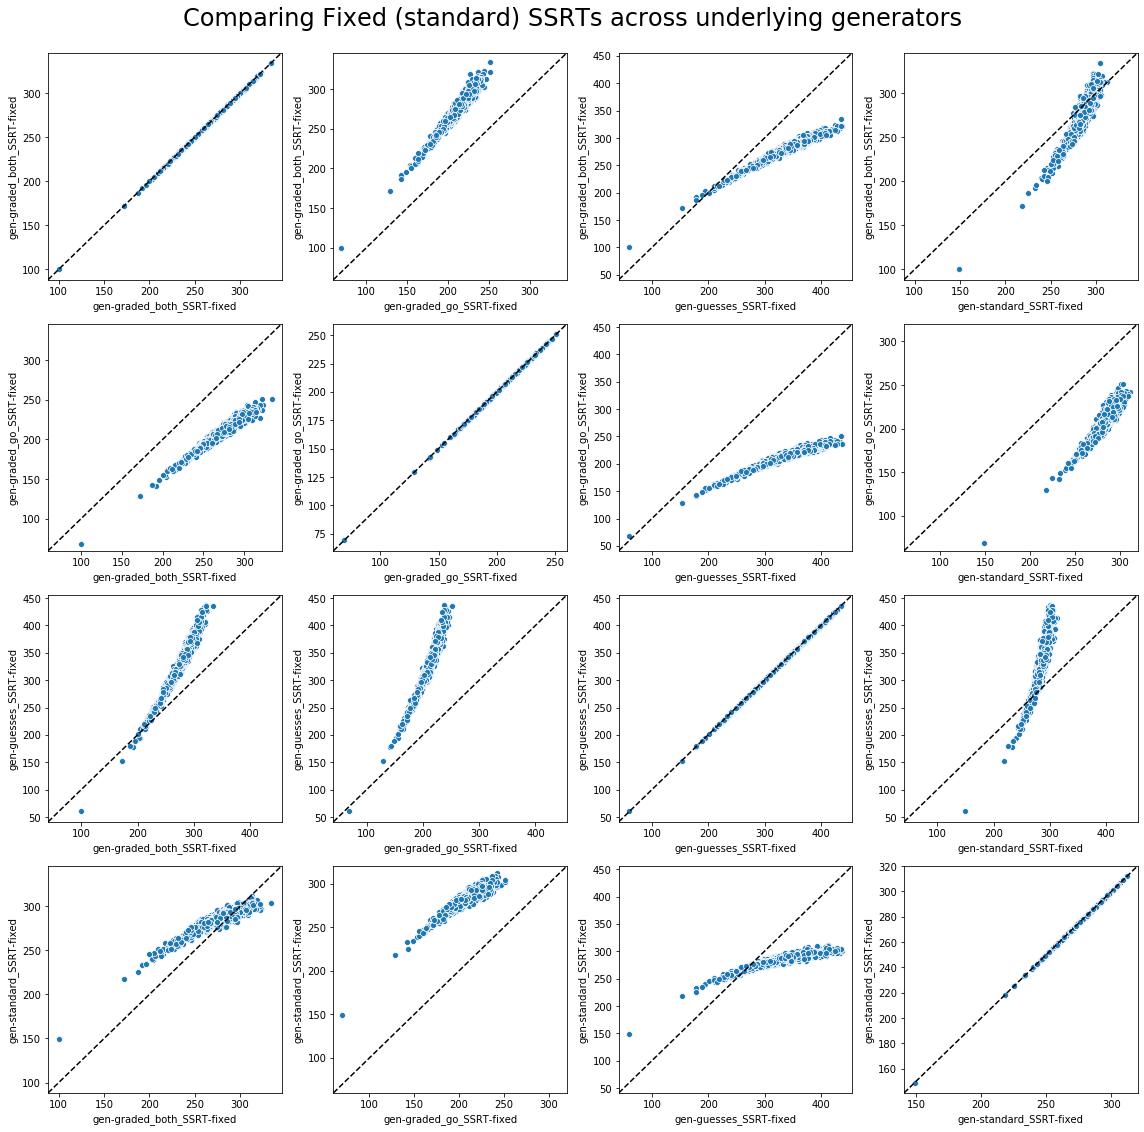

In [15]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [16]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed
gen-graded_both_SSRT-fixed,1.000000,0.960885,0.978700,0.903673
gen-graded_go_SSRT-fixed,0.960885,1.000000,0.972519,0.893674
gen-guesses_SSRT-fixed,0.978700,0.972519,1.000000,0.914327
gen-standard_SSRT-fixed,0.903673,0.893674,0.914327,1.000000


## (not rescaling the axes to get a closer look)

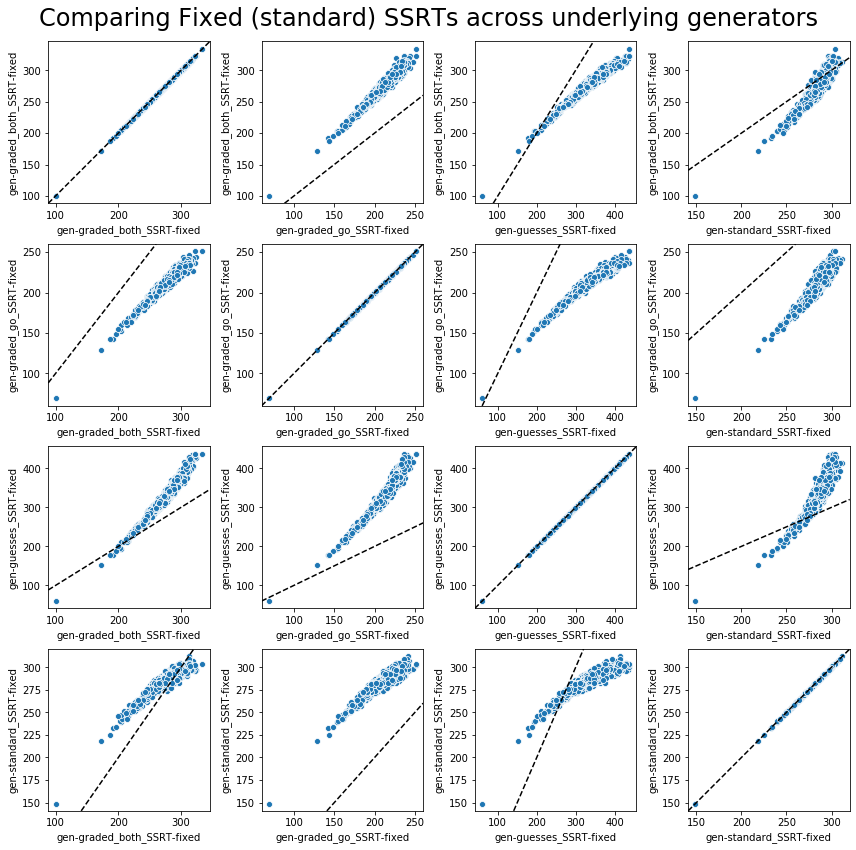

In [17]:
curr_df = monster_df.filter(regex='fixed')
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Weighted SSRTs (from randomly assigned SSD distributions)

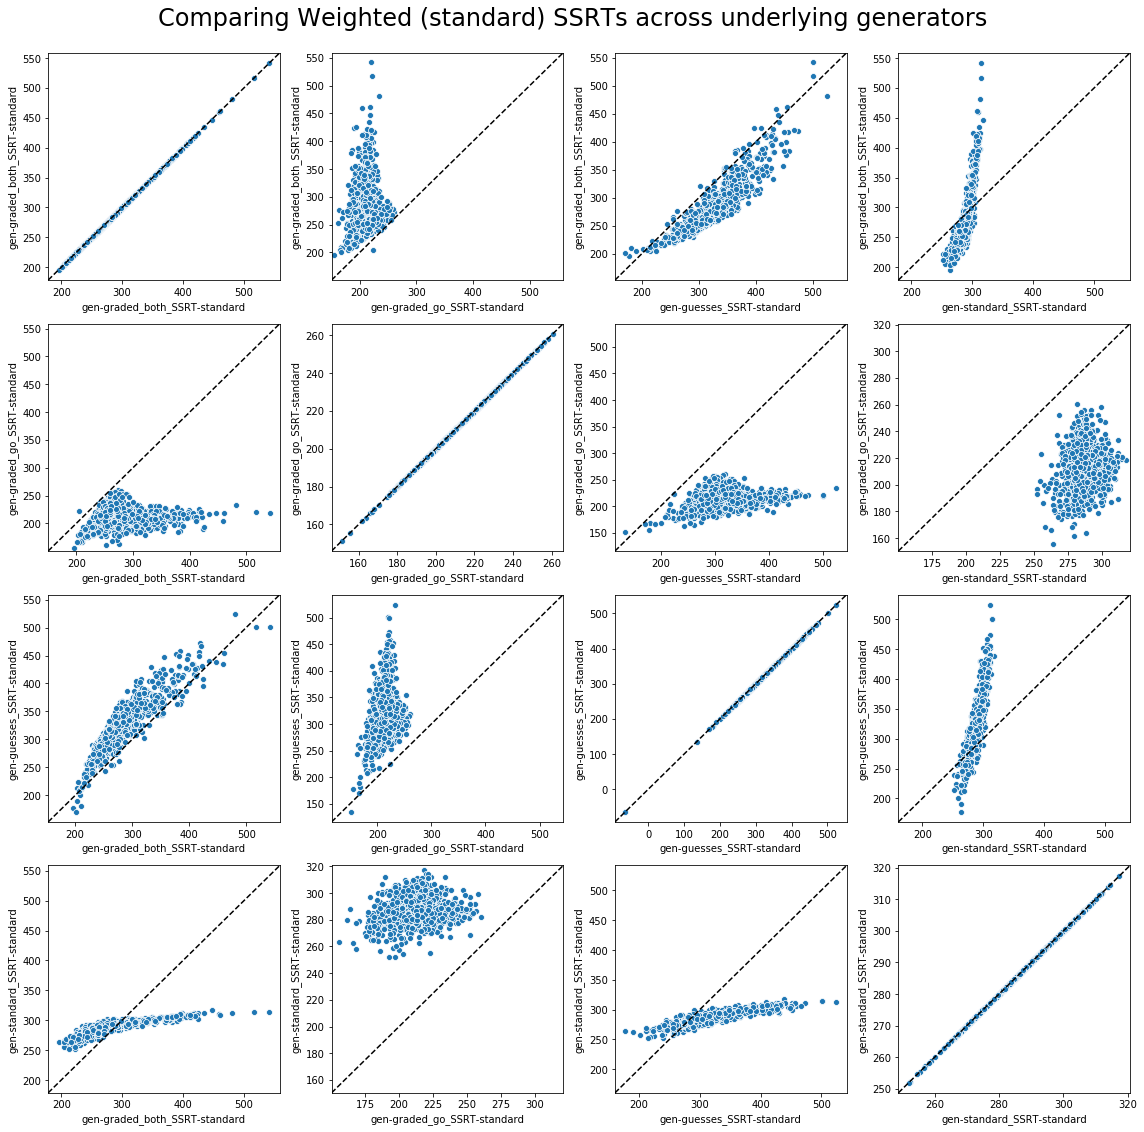

In [18]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [19]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard
gen-graded_both_SSRT-standard,1.000000,0.087175,0.906305,0.829301
gen-graded_go_SSRT-standard,0.087175,1.000000,0.181961,0.130613
gen-guesses_SSRT-standard,0.906305,0.181961,1.000000,0.829932
gen-standard_SSRT-standard,0.829301,0.130613,0.829932,1.000000


## not rescaling axis to get a closer look

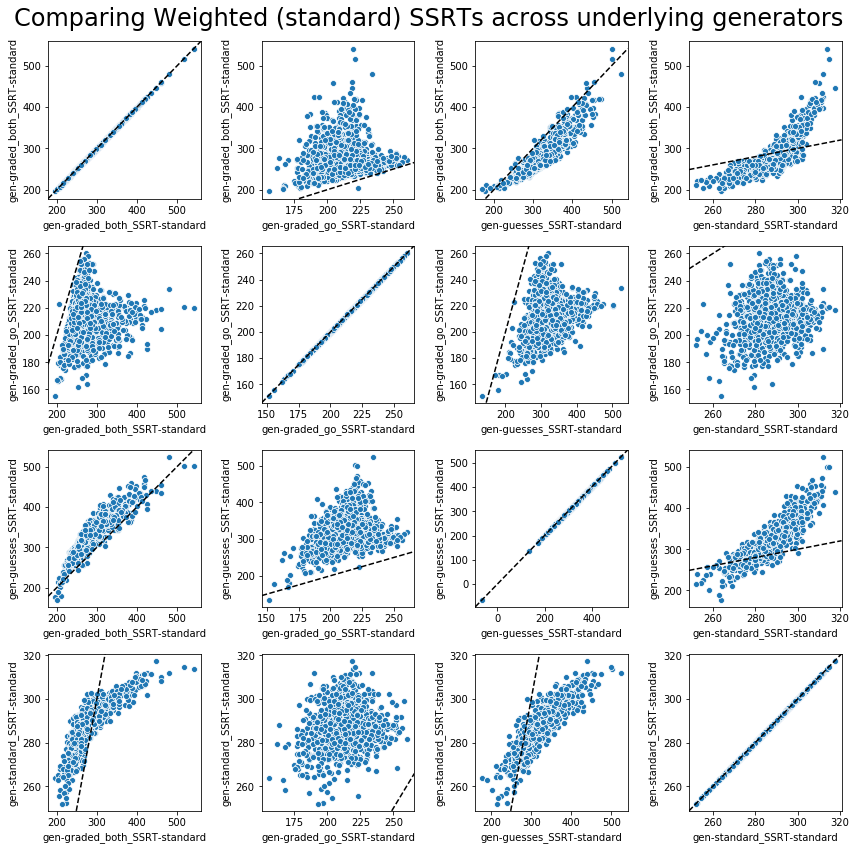

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

# Tracking-based SSRTs

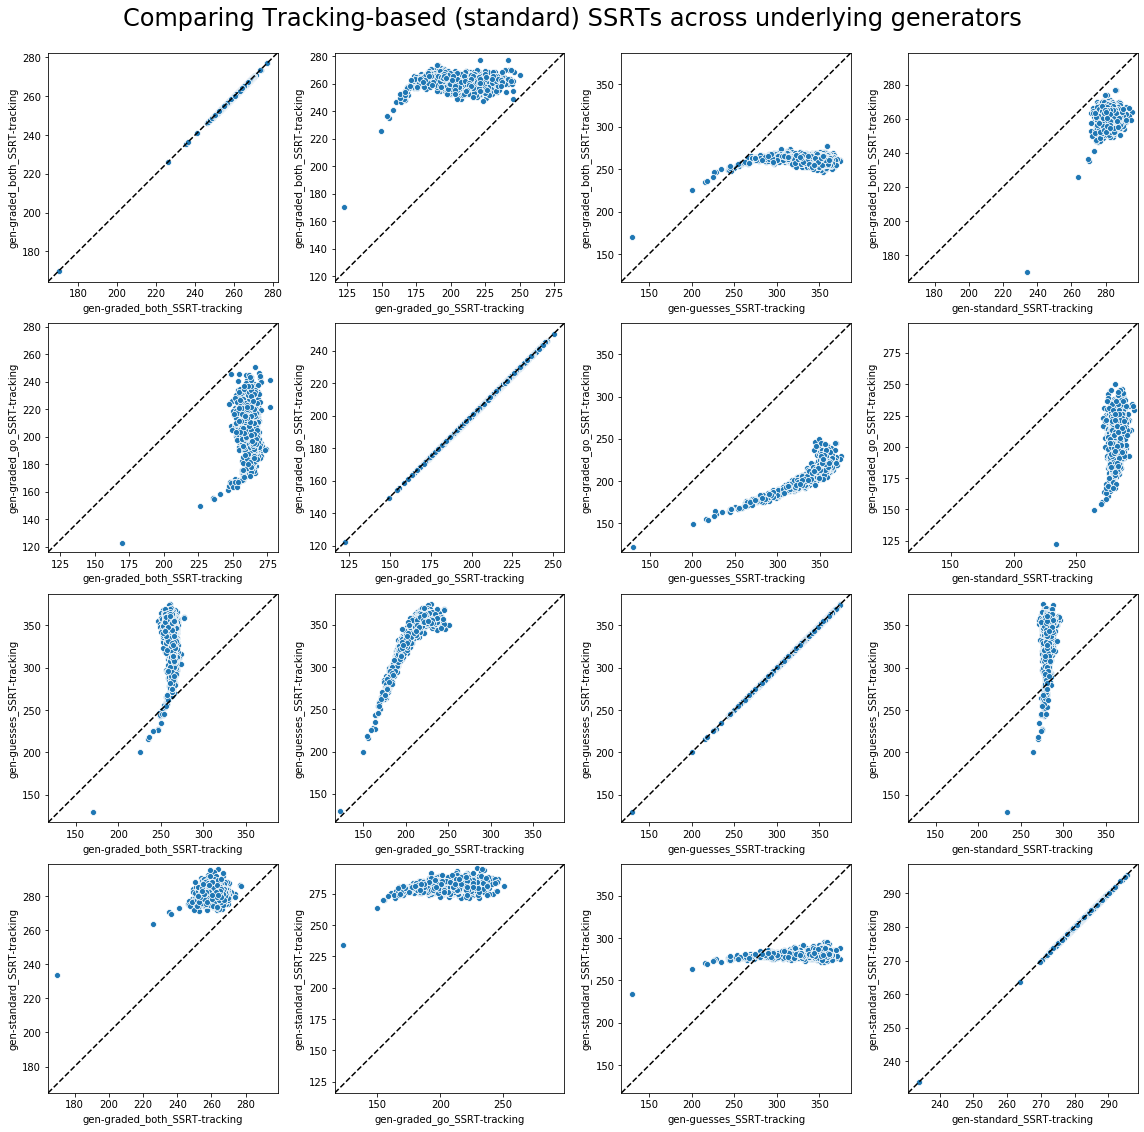

In [21]:
curr_df = monster_df.filter(regex='SSRT-tracking')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [22]:
curr_df.corr(method='spearman')

,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
gen-graded_both_SSRT-tracking,1.000000,-0.221860,-0.247655,0.025415
gen-graded_go_SSRT-tracking,-0.221860,1.000000,0.930938,0.196064
gen-guesses_SSRT-tracking,-0.247655,0.930938,1.000000,0.163644
gen-standard_SSRT-tracking,0.025415,0.196064,0.163644,1.000000


## not rescaling axes

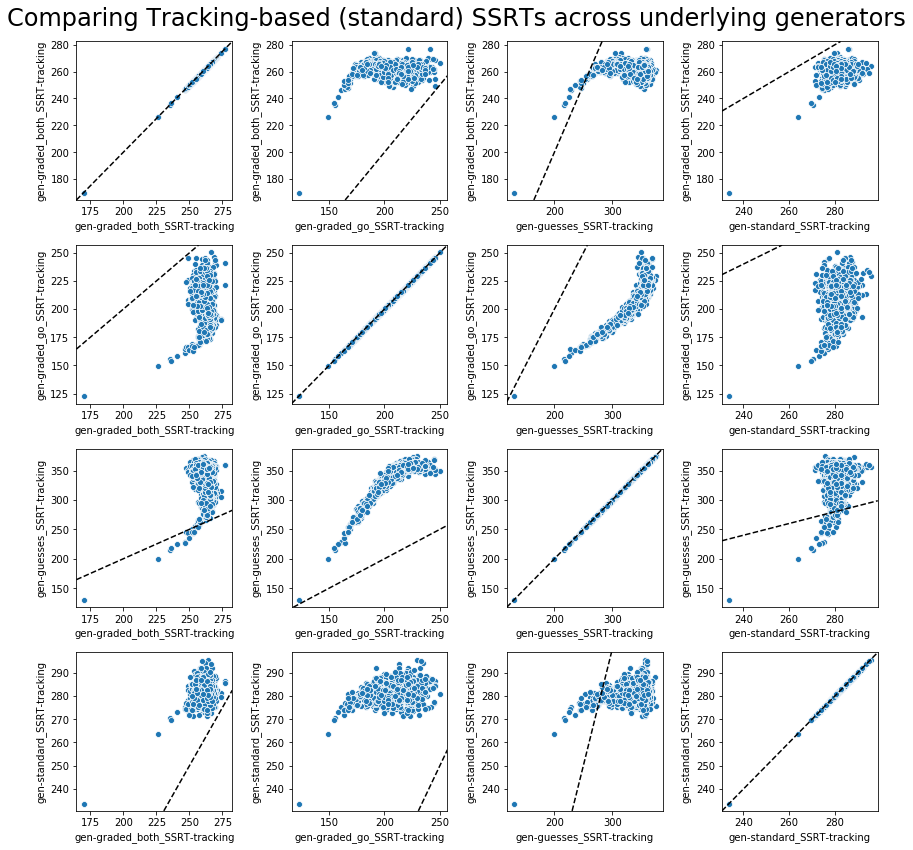

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
#         ax = make_plot_square(ax)
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Tracking-based (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [24]:
main_cols = ['assigned_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard',
             'gen-guesses_SSRT-standard',
             'gen-standard_SSRT-standard',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed',
             'gen-guesses_SSRT-fixed',
             'gen-standard_SSRT-fixed',
             'gen-graded_both_SSRT-tracking',
             'gen-graded_go_SSRT-tracking',
             'gen-guesses_SSRT-tracking',
             'gen-standard_SSRT-tracking']
monster_df[main_cols].describe()

,assigned_SSRT,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard,gen-guesses_SSRT-standard,gen-standard_SSRT-standard,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed,gen-guesses_SSRT-fixed,gen-standard_SSRT-fixed,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking,gen-guesses_SSRT-tracking,gen-standard_SSRT-tracking
count,1.152000e+03,1150.000000,1151.000000,1152.000000,1147.000000,1152.000000,1152.000000,1152.000000,1152.00000,1152.000000,1152.000000,1152.000000,1152.000000
mean,3.013400e+02,276.567303,213.714282,318.634592,287.023904,275.880208,211.605035,331.786458,284.84375,260.526733,205.447816,333.999469,281.228170
std,4.720053e-12,41.374008,15.398567,45.006562,9.399520,22.332288,16.800493,42.846193,12.13241,5.224726,15.955607,27.145447,3.867078
min,3.013400e+02,195.783333,151.450000,-63.866667,251.983333,100.000000,69.000000,60.000000,149.00000,169.906000,122.516000,129.880000,233.750000
25%,3.013400e+02,251.981410,204.045408,292.945198,281.654762,264.000000,203.000000,307.750000,280.00000,258.023500,195.737000,323.000000,278.715500
50%,3.013400e+02,265.216667,214.183333,312.684729,287.000000,279.000000,214.000000,336.000000,287.00000,260.860000,205.865000,341.671000,281.097000
75%,3.013400e+02,289.736111,223.008475,341.595833,292.403531,291.000000,223.000000,360.250000,293.00000,263.460500,216.059500,353.646000,283.452000
max,3.013400e+02,541.600000,260.555556,524.250000,317.400000,334.000000,251.000000,437.000000,312.00000,277.042000,250.474000,374.796000,295.562000


In [25]:
df.corr(method='spearman')

,gen-graded_both_SSRT-standard,gen-graded_go_SSRT-standard.1,gen-guesses_SSRT-standard.2,gen-standard_SSRT-standard.3,gen-graded_both_SSRT-guesses,gen-graded_go_SSRT-guesses.1,gen-guesses_SSRT-guesses.2,gen-standard_SSRT-guesses.3,gen-graded_both_SSRT-graded_go,gen-graded_go_SSRT-graded_go.1,...,gen-guesses_SSRT-graded_both.2,gen-standard_SSRT-graded_both.3,gen-graded_both_SSRT-fixed,gen-graded_go_SSRT-fixed.1,gen-guesses_SSRT-fixed.2,gen-standard_SSRT-fixed.3,gen-graded_both_SSRT-tracking,gen-graded_go_SSRT-tracking.1,gen-guesses_SSRT-tracking.2,gen-standard_SSRT-tracking.3
gen-graded_both_SSRT-standard,1.000000,0.087175,0.906305,0.829301,0.095851,-0.785041,0.665017,-0.886052,0.791614,0.797478,...,0.839769,0.566534,0.561382,0.547148,0.551107,0.521056,-0.147699,0.545110,0.537803,0.129053
gen-graded_go_SSRT-standard.1,0.087175,1.000000,0.181961,0.130613,-0.264386,0.424269,0.147830,-0.124065,-0.431411,-0.102953,...,-0.340836,-0.700427,0.710841,0.730678,0.717529,0.666607,-0.115841,0.695977,0.678859,0.144249
gen-guesses_SSRT-standard.2,0.906305,0.181961,1.000000,0.829932,-0.225531,-0.754160,0.762645,-0.968797,0.696910,0.773751,...,0.786571,0.464615,0.699854,0.699066,0.714468,0.663759,-0.181728,0.699687,0.691142,0.164725
gen-standard_SSRT-standard.3,0.829301,0.130613,0.829932,1.000000,-0.031493,-0.668796,0.597858,-0.731665,0.644768,0.685196,...,0.707650,0.464280,0.554196,0.548811,0.557870,0.642308,-0.150128,0.545031,0.543427,0.127805
gen-graded_both_SSRT-guesses,0.095851,-0.264386,-0.225531,-0.031493,1.000000,0.014234,-0.093631,0.230556,0.147451,-0.046614,...,0.037326,0.220374,-0.405862,-0.423019,-0.438702,-0.391442,0.053083,-0.436604,-0.417916,-0.115590
gen-graded_go_SSRT-guesses.1,-0.785041,0.424269,-0.754160,-0.668796,0.014234,1.000000,-0.527764,0.768985,-0.957815,-0.808832,...,-0.980824,-0.901547,-0.169852,-0.166116,-0.174093,-0.165970,0.052691,-0.178310,-0.181851,-0.059557
gen-guesses_SSRT-guesses.2,0.665017,0.147830,0.762645,0.597858,-0.093631,-0.527764,1.000000,-0.662946,0.499904,0.570347,...,0.575417,0.318117,0.503255,0.503624,0.543503,0.474763,-0.121463,0.504508,0.482034,0.115592
gen-standard_SSRT-guesses.3,-0.886052,-0.124065,-0.968797,-0.731665,0.230556,0.768985,-0.662946,1.000000,-0.705445,-0.769349,...,-0.788962,-0.484011,-0.643187,-0.643342,-0.651296,-0.580997,0.182066,-0.646603,-0.639642,-0.149227
gen-graded_both_SSRT-graded_go,0.791614,-0.431411,0.696910,0.644768,0.147451,-0.957815,0.499904,-0.705445,1.000000,0.809182,...,0.979696,0.927104,0.110698,0.112889,0.110457,0.109097,-0.058070,0.111857,0.119099,0.045333
gen-graded_go_SSRT-graded_go.1,0.797478,-0.102953,0.773751,0.685196,-0.046614,-0.808832,0.570347,-0.769349,0.809182,1.000000,...,0.852031,0.683959,0.354274,0.370478,0.359365,0.333568,-0.122153,0.363395,0.350250,0.090203


In [26]:
# monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()].to_csv('simulation_mainSSRTs_scale0.csv')
len(monster_df[main_cols].loc[monster_df['gen-graded_both_SSRT-standard'].notnull()])

1150

# Plot graded Mu Go function

In [27]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


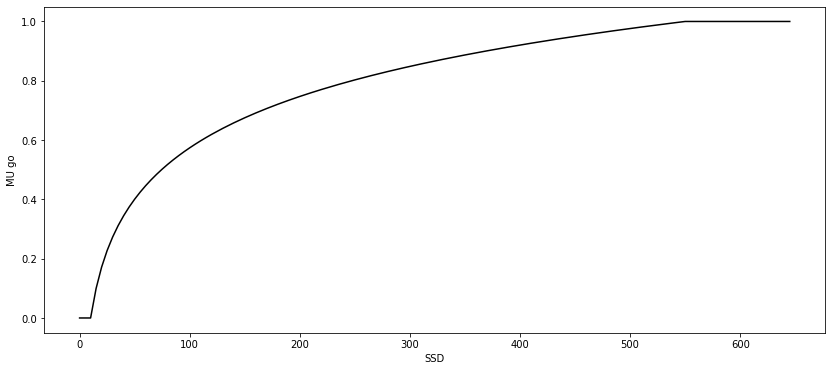

In [28]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')

In [29]:
monster_df.index.unique()

Index(['00J52GPG', '00LJVZK2', '00R4TXET', '028WCTG6', '029PWCFY', '030W95VP',
       '03VJZEL', '040B4TRC', '04BFG4JM', '052HU3CU',
       ...
       'ZRR4D9LW', 'ZTN5R70A', 'ZTP2ZHLN', 'ZTTGYL51', 'ZUDPGDWJ', 'ZUXHPX3N',
       'ZWWDT1TG', 'ZXF5C635', 'ZXPAWB32', 'ZYF317MG'],
      dtype='object', length=1152)